<a href="https://colab.research.google.com/github/TVHM/summer_microcredentials_BUS/blob/main/mcphearson__of_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')


In [4]:
df.date[:2]

0    2020-01-21
1    2020-01-22
Name: date, dtype: object

The data set contains 5 features about COVID 19 pandemic in the United States.
The first and last 5 rows of the data set reflect the number of cases and deaths reported from Jan 1, 2020 to July 24, 2022.

In [5]:
# print(df)

In [6]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
df.shape

(49622, 5)

In [8]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [9]:
ny_df = df[df['state']=='New York']

In [10]:
print(ny_df)

             date     state  fips    cases  deaths
246    2020-03-01  New York    36        1       0
261    2020-03-02  New York    36        1       0
276    2020-03-03  New York    36        2       0
293    2020-03-04  New York    36       11       0
313    2020-03-05  New York    36       22       0
...           ...       ...   ...      ...     ...
49376  2022-08-11  New York    36  5882394   69941
49432  2022-08-12  New York    36  5888845   69976
49488  2022-08-13  New York    36  5891418   69976
49544  2022-08-14  New York    36  5893546   69976
49600  2022-08-15  New York    36  5900333   70001

[898 rows x 5 columns]


In [11]:
#find geometric mean 

In [12]:
ny_df.describe()

,fips,cases,deaths
count,898.0,8.980000e+02,898.000000
mean,36.0,2.308231e+06,47282.267261
std,0.0,1.857672e+06,17220.998507
min,36.0,1.000000e+00,0.000000
25%,36.0,4.792710e+05,32883.250000
50%,36.0,2.094011e+06,52606.000000
75%,36.0,3.662929e+06,59218.000000
max,36.0,5.900333e+06,70001.000000


In [13]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [14]:
ny_df.shape

(898, 5)

In [15]:
ny_df.tail()

,date,state,fips,cases,deaths
49376,2022-08-11,New York,36,5882394,69941
49432,2022-08-12,New York,36,5888845,69976
49488,2022-08-13,New York,36,5891418,69976
49544,2022-08-14,New York,36,5893546,69976
49600,2022-08-15,New York,36,5900333,70001


In [16]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


An analysis of the 5 days inthe period Mar 1 to Mar 5 of  the 30 day period, there were zero deaths,cases began to rise, doubling from Mar 4 to Mar 5 2020.

In [17]:
#last death in NY
last_ny_death = ny_df[ny_df['deaths']!=876]
last_ny_death.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [18]:
#total number of cases
ny_df['cases'].max()

5900333

In [19]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

2072791604

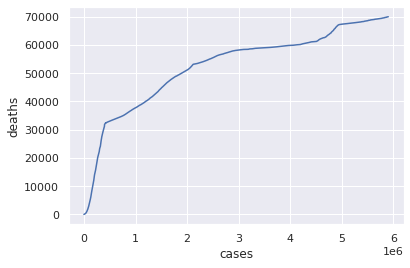

In [20]:
#load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

date = ny_df[ny_df['date']!=0]
sns.lineplot(data=ny_df, x = "cases", y = "deaths")





Finding new covid 19 cases on daily basis (new cases added everyday)

In [21]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [22]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [24]:
ny_df['new_cases'].sum()

5900333

In [25]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [26]:
type(ny_new_cases)

pandas.core.series.Series

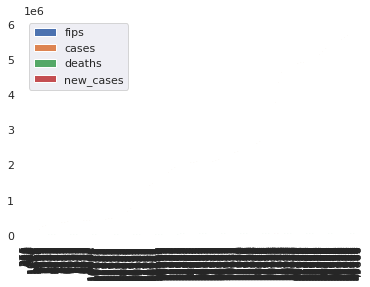

In [27]:
ny_df.plot(kind='bar')

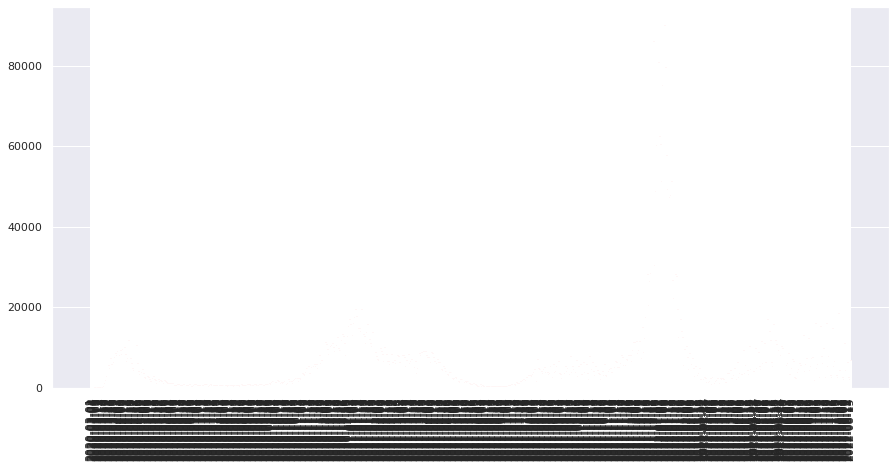

In [28]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [29]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [30]:
# ny_dates_30

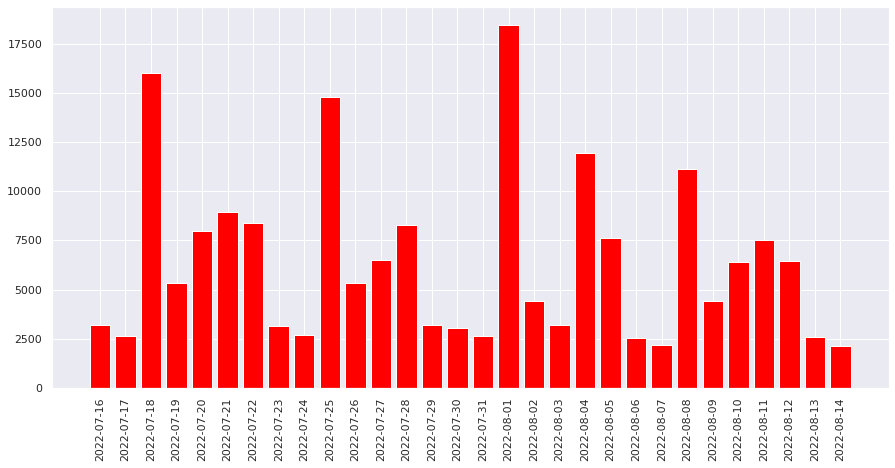

In [31]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

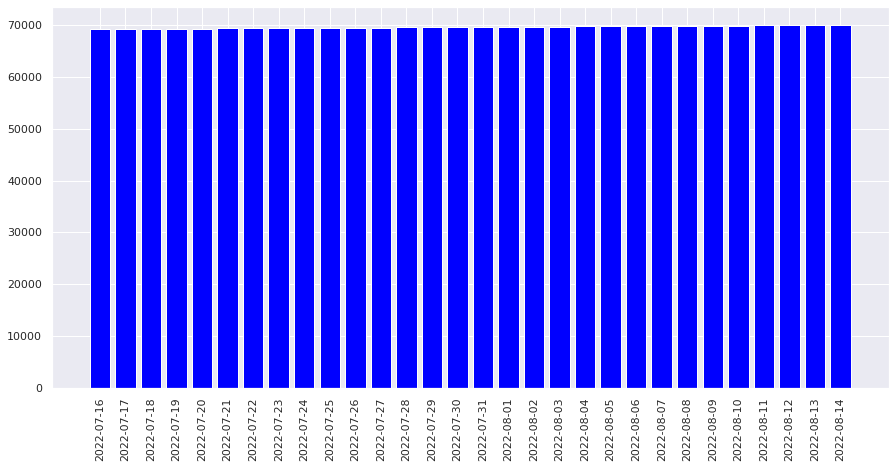

In [32]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [33]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

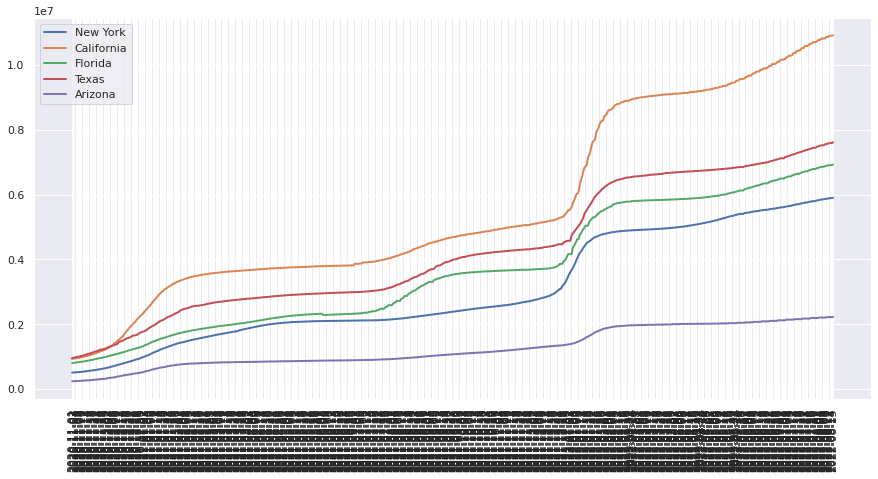

In [34]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion


#Conclusion 1 New York COVID 19 Cases and Deaths 
The graph shows a noticeable spike in the number of reported COVID 10 cases and deaths.  Out of 30,000 reported incidents, the marginal rate of growth was nearly one death for every case reported.  

Above 30,000 reported incidents, and the rate of growth in the number of deaths begins to decrease. The earlier number of reported cases in period 1 resulted in a decrease in the number of reported COVID 19 related deaths.

Between peiods 3 and 4 the graph-slopeline flattens indicating that above 60,000 reported incidents, the relationshp between growth in the number of reported deaths and reported cases diminishes.

Above 70,000 reported incidents the graph line slope in period 4 and 5 repeats from period 1 ( at 0 deaths) The relationship between the number of reported cases and deaths begins to corelate along its slope.

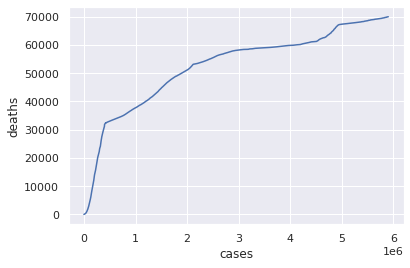

In [35]:
#Conclusion 1
#load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

date = ny_df[ny_df['date']!=0]
sns.lineplot(data=ny_df, x = "cases", y = "deaths")

In [36]:
#Conclusion 2